## **Data Cleaning**

In [54]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [55]:
#loading data
file_a = pd.read_csv("anxiety.csv")
print("\nOriginal file:")
print(file_a)

# adding header
headerList = ['Date', 'Tweet', 'Name', 'Location']
  
# converting data frame to csv
file_a.to_csv("a.csv", header=headerList, index=False)
  
# display modified csv file
file_anxiety = pd.read_csv("a.csv")
print('\nModified file:')
print(file_anxiety)
file_anxiety.head()


Original file:
      2021-11-30 17:42:38+00:00  ...                           b'Vaughan, Ontario'
0     2021-11-30 17:42:23+00:00  ...                b'Chicago IL \xf0\x9f\x8c\x87'
1     2021-11-30 17:40:04+00:00  ...                        b'North East, England'
2     2021-11-30 17:38:23+00:00  ...                                           b''
3     2021-11-30 17:35:13+00:00  ...                              b'Kentucky, USA'
4     2021-11-30 17:35:08+00:00  ...                             b'Cardiff, Wales'
...                         ...  ...                                           ...
7393  2021-11-23 10:43:14+00:00  ...                        b'Lynchburg, va 24506'
7394  2021-11-23 10:42:49+00:00  ...                                           b''
7395  2021-11-23 10:40:09+00:00  ...  b'800 332-7359 \xe2\x80\xa2 Get free app at'
7396  2021-11-25 05:42:19+00:00  ...                                      b'India'
7397  2021-11-24 12:40:40+00:00  ...                                   

,Date,Tweet,Name,Location
0,2021-11-30 17:42:23+00:00,b'@fullyvaxxedhero You right! \n\nBut it\xe2\x80\x99s just to intense #anxiety',b'mszadiedudley',b'Chicago IL \xf0\x9f\x8c\x87'
1,2021-11-30 17:40:04+00:00,b'Hey \xf0\x9f\x91\x8b @vipmumsndads Thank you \xf0\x9f\x98\x8a #anxiety #ADHD #mentalhealth #wo...,b'sensorytreasur',"b'North East, England'"
2,2021-11-30 17:38:23+00:00,b'We were afraid of tomorrow to come\n We meet someone lost and separated\n We are afraid to run...,b'j_linmar',b''
3,2021-11-30 17:35:13+00:00,b'I have barely been out of the house for about two weeks now. Today I have to drive myself to t...,b'KevinsBebe',"b'Kentucky, USA'"
4,2021-11-30 17:35:08+00:00,b'@BLKMenopause @Pausitivity2 @CV_UHB @PharmaSupport I realise now that the photo on my 50th doe...,b'kmmurray97',"b'Cardiff, Wales'"


In [56]:
print('Dataset size:',file_anxiety.shape)
print('Columns are:',file_anxiety.columns)

Dataset size: (7398, 4)
Columns are: Index(['Date', 'Tweet', 'Name', 'Location'], dtype='object')


In [57]:
file_anxiety.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      7398 non-null   object
 1   Tweet     7398 non-null   object
 2   Name      7398 non-null   object
 3   Location  7398 non-null   object
dtypes: object(4)
memory usage: 231.3+ KB


In [58]:
df_anxiety  = pd.DataFrame(file_anxiety[['Date', 'Tweet']])
df_anxiety.head()

,Date,Tweet
0,2021-11-30 17:42:23+00:00,b'@fullyvaxxedhero You right! \n\nBut it\xe2\x80\x99s just to intense #anxiety'
1,2021-11-30 17:40:04+00:00,b'Hey \xf0\x9f\x91\x8b @vipmumsndads Thank you \xf0\x9f\x98\x8a #anxiety #ADHD #mentalhealth #wo...
2,2021-11-30 17:38:23+00:00,b'We were afraid of tomorrow to come\n We meet someone lost and separated\n We are afraid to run...
3,2021-11-30 17:35:13+00:00,b'I have barely been out of the house for about two weeks now. Today I have to drive myself to t...
4,2021-11-30 17:35:08+00:00,b'@BLKMenopause @Pausitivity2 @CV_UHB @PharmaSupport I realise now that the photo on my 50th doe...


In [59]:
#loading data
file_d = pd.read_csv("depression.csv")
print("\nOriginal file:")
print(file_d)

# adding header
headerList = ['Date', 'Tweet', 'Name', 'Location']
  
# converting data frame to csv
file_d.to_csv("d.csv", header=headerList, index=False)
  
# display modified csv file
file_depression = pd.read_csv("d.csv")
print('\nModified file:')
print(file_depression)
file_depression.head()


Original file:
      2021-12-02 06:06:57+00:00  ...                                                                                 b'Mira Road, Mumbai'
0     2021-12-02 06:03:47+00:00  ...  b'\xef\xbc\x88\xe5\xa4\x8f\xe3\x81\xae\xe5\x90\x91\xe3\x81\x93\xe3\x81\x86\xe5\x81\xb4) (#\xe6\x...
1     2021-12-02 06:01:41+00:00  ...                                                                                   b'The Netherlands'
2     2021-12-02 05:53:40+00:00  ...                                                                                   b'Tokyo-to, Japan'
3     2021-12-02 05:51:00+00:00  ...                                                                     b'Sacramento, CA, United States'
4     2021-12-02 05:50:24+00:00  ...                                                                                       b'Nevada, USA'
...                         ...  ...                                                                                                  ...
9285  2021-11-23 1

,Date,Tweet,Name,Location
0,2021-12-02 06:03:47+00:00,"b""I hope I find the courage to kill myself tomorrow.\nI don't have the right to have a job, have...",b'malictory',b'\xef\xbc\x88\xe5\xa4\x8f\xe3\x81\xae\xe5\x90\x91\xe3\x81\x93\xe3\x81\x86\xe5\x81\xb4) (#\xe6\x...
1,2021-12-02 06:01:41+00:00,b'I think I am losing myself \xf0\x9f\x98\x94 #depression #MentalHealthMatters #MentalHealthAwar...,b'maickel1979',b'The Netherlands'
2,2021-12-02 05:53:40+00:00,"b'When YOU are \xe2\x80\x98ready\xe2\x80\x99/willing \n(&amp;ideally not spiralling, although I ...",b'Eclecticakemix',"b'Tokyo-to, Japan'"
3,2021-12-02 05:51:00+00:00,"b'So crippled by grief, depression and stress that getting out of bed and doing one thing is a s...",b'JaxAttacksPoker',"b'Sacramento, CA, United States'"
4,2021-12-02 05:50:24+00:00,"b""#sad #furbaby #depression part2\n Check out Mrslile Gamer's video! #TikTok https://t.co/m9ZQ1X...",b'Mrs_lil_eGaMer',"b'Nevada, USA'"


In [60]:
print('Dataset size:',file_depression.shape)
print('Columns are:',file_depression.columns)

Dataset size: (9290, 4)
Columns are: Index(['Date', 'Tweet', 'Name', 'Location'], dtype='object')


In [61]:
file_depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9290 entries, 0 to 9289
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      9290 non-null   object
 1   Tweet     9290 non-null   object
 2   Name      9290 non-null   object
 3   Location  9290 non-null   object
dtypes: object(4)
memory usage: 290.4+ KB


In [62]:
df_dep  = pd.DataFrame(file_depression[['Date', 'Tweet']])
df_dep.head()

,Date,Tweet
0,2021-12-02 06:03:47+00:00,"b""I hope I find the courage to kill myself tomorrow.\nI don't have the right to have a job, have..."
1,2021-12-02 06:01:41+00:00,b'I think I am losing myself \xf0\x9f\x98\x94 #depression #MentalHealthMatters #MentalHealthAwar...
2,2021-12-02 05:53:40+00:00,"b'When YOU are \xe2\x80\x98ready\xe2\x80\x99/willing \n(&amp;ideally not spiralling, although I ..."
3,2021-12-02 05:51:00+00:00,"b'So crippled by grief, depression and stress that getting out of bed and doing one thing is a s..."
4,2021-12-02 05:50:24+00:00,"b""#sad #furbaby #depression part2\n Check out Mrslile Gamer's video! #TikTok https://t.co/m9ZQ1X..."


In [63]:
#loading data
file_p = pd.read_csv("PTSD.csv")
print("\nOriginal file:")
print(file_p)

# adding header
headerList = ['Date', 'Tweet', 'Name', 'Location']
  
# converting data frame to csv
file_p.to_csv("p.csv", header=headerList, index=False)
  
# display modified csv file
file_ptsd = pd.read_csv("p.csv")
print('\nModified file:')
print(file_ptsd)
file_ptsd.head()


Original file:
       2021-12-02 06:02:47+00:00  ...                  b'NSW, Australia'
0      2021-12-02 05:52:53+00:00  ...                     b'Sapulpa, OK'
1      2021-12-02 05:52:19+00:00  ...   b'Consults aspiengirl@gmail.com'
2      2021-12-02 05:30:19+00:00  ...                       b'Australia'
3      2021-12-02 05:30:12+00:00  ...                    b'New York, NY'
4      2021-12-02 05:21:09+00:00  ...                  b'Pittsburgh, PA'
...                          ...  ...                                ...
13408  2021-11-26 08:37:54+00:00  ...  b'df if u feel uncmf wth my age '
13409  2021-11-26 08:37:54+00:00  ...             b'teuland at fantasia'
13410  2021-11-26 08:37:53+00:00  ...                                b''
13411  2021-11-26 08:37:52+00:00  ...                                b''
13412  2021-11-26 08:37:49+00:00  ...                                b''

[13413 rows x 4 columns]

Modified file:
                            Date  ...                           Lo

,Date,Tweet,Name,Location
0,2021-12-02 05:52:53+00:00,b'Having #bipolardisorder is bad enough let alone having #PTSD \n#Schizophrenia #MajorDepressive...,b'FashionKattz',"b'Sapulpa, OK'"
1,2021-12-02 05:52:19+00:00,b'We see this in #PTSD. #trauma causes An incredible rush of hormones that leaves an imprint on ...,b'TaniaAMarshall',b'Consults aspiengirl@gmail.com'
2,2021-12-02 05:30:19+00:00,b'#US #FDA grants new fast designation for ... \nhttps://t.co/pp8kUFctKB\n#Agbiotech #Antidepres...,b'MirageNewsCom',b'Australia'
3,2021-12-02 05:30:12+00:00,b'World AIDS Day\xf0\x9f\x8e\x97 #AIDS #aidsday #HIV #DiaMundialDelSida #AIDSday2021 #AIDSawaren...,b'ArratiaCarmen',"b'New York, NY'"
4,2021-12-02 05:21:09+00:00,"b""@NancyGrace Why isn't there a national child abuse registry? #domesticviolenceawareness #ptsd ...",b'Jennyfrmthebl0g',"b'Pittsburgh, PA'"


In [64]:
file_ptsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13413 entries, 0 to 13412
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      13413 non-null  object
 1   Tweet     13413 non-null  object
 2   Name      13413 non-null  object
 3   Location  13413 non-null  object
dtypes: object(4)
memory usage: 419.3+ KB


In [65]:
df_ptsd = pd.DataFrame(file_ptsd[['Date', 'Tweet']])
df_ptsd.head()

,Date,Tweet
0,2021-12-02 05:52:53+00:00,b'Having #bipolardisorder is bad enough let alone having #PTSD \n#Schizophrenia #MajorDepressive...
1,2021-12-02 05:52:19+00:00,b'We see this in #PTSD. #trauma causes An incredible rush of hormones that leaves an imprint on ...
2,2021-12-02 05:30:19+00:00,b'#US #FDA grants new fast designation for ... \nhttps://t.co/pp8kUFctKB\n#Agbiotech #Antidepres...
3,2021-12-02 05:30:12+00:00,b'World AIDS Day\xf0\x9f\x8e\x97 #AIDS #aidsday #HIV #DiaMundialDelSida #AIDSday2021 #AIDSawaren...
4,2021-12-02 05:21:09+00:00,"b""@NancyGrace Why isn't there a national child abuse registry? #domesticviolenceawareness #ptsd ..."


In [66]:
#defining functions required for data cleaning

#removing @pattern and url text
import re
def remove_url(text):
    text = re.sub('@[\w]+','',text)
    text = re.sub(r"\S*https?:\S*", "", text)
    print(text)

#removing punctuation
string.punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
#performing tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

#removing stopwords
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
    
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

#stemming
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

#lemmatization
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

#processed clean text
def clean_text(txt):
    text = str(txt).replace('[', '').replace(']', '').replace(', ', ' ').replace(',', ' ')
    return text




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:
#applying data cleaning functions on anxiety data
df_anxiety['Tweet_punct'] = df_anxiety['Tweet'].apply(lambda x: remove_punct(x))
df_anxiety['Tweet_tokenized'] = df_anxiety['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df_anxiety['Tweet_nonstop'] = df_anxiety['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df_anxiety['Tweet_stemmed'] = df_anxiety['Tweet_nonstop'].apply(lambda x: stemming(x))
df_anxiety['Tweet_lemmatized'] = df_anxiety['Tweet_stemmed'].apply(lambda x: lemmatizer(x))
df_anxiety['Clean_text'] = df_anxiety['Tweet_lemmatized'].apply(lambda x: clean_text(x))

df_anxiety.head(10)

,Date,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,Clean_text
0,2021-11-30 17:42:23+00:00,b'@fullyvaxxedhero You right! \n\nBut it\xe2\x80\x99s just to intense #anxiety',bfullyvaxxedhero You right nnBut itxexxs just to intense anxiety,"[bfullyvaxxedhero, you, right, nnbut, itxexxs, just, to, intense, anxiety]","[bfullyvaxxedhero, right, nnbut, itxexxs, intense, anxiety]","[bfullyvaxxedhero, right, nnbut, itxexx, intens, anxieti]","[bfullyvaxxedhero, right, nnbut, itxexx, intens, anxieti]",'bfullyvaxxedhero' 'right' 'nnbut' 'itxexx' 'intens' 'anxieti'
1,2021-11-30 17:40:04+00:00,b'Hey \xf0\x9f\x91\x8b @vipmumsndads Thank you \xf0\x9f\x98\x8a #anxiety #ADHD #mentalhealth #wo...,bHey xfxfxxb vipmumsndads Thank you xfxfxxa anxiety ADHD mentalhealth worrytrolls httpstcoQABIAelM,"[bhey, xfxfxxb, vipmumsndads, thank, you, xfxfxxa, anxiety, adhd, mentalhealth, worrytrolls, htt...","[bhey, xfxfxxb, vipmumsndads, thank, xfxfxxa, anxiety, adhd, mentalhealth, worrytrolls, httpstco...","[bhey, xfxfxxb, vipmumsndad, thank, xfxfxxa, anxieti, adhd, mentalhealth, worrytrol, httpstcoqab...","[bhey, xfxfxxb, vipmumsndad, thank, xfxfxxa, anxieti, adhd, mentalhealth, worrytrol, httpstcoqab...",'bhey' 'xfxfxxb' 'vipmumsndad' 'thank' 'xfxfxxa' 'anxieti' 'adhd' 'mentalhealth' 'worrytrol' 'ht...
2,2021-11-30 17:38:23+00:00,b'We were afraid of tomorrow to come\n We meet someone lost and separated\n We are afraid to run...,bWe were afraid of tomorrow to comen We meet someone lost and separatedn We are afraid to run an...,"[bwe, were, afraid, of, tomorrow, to, comen, we, meet, someone, lost, and, separatedn, we, are, ...","[bwe, afraid, tomorrow, comen, meet, someone, lost, separatedn, afraid, run, afraid, toxexxa, ht...","[bwe, afraid, tomorrow, comen, meet, someon, lost, separatedn, afraid, run, afraid, toxexxa, htt...","[bwe, afraid, tomorrow, comen, meet, someon, lost, separatedn, afraid, run, afraid, toxexxa, htt...",'bwe' 'afraid' 'tomorrow' 'comen' 'meet' 'someon' 'lost' 'separatedn' 'afraid' 'run' 'afraid' 't...
3,2021-11-30 17:35:13+00:00,b'I have barely been out of the house for about two weeks now. Today I have to drive myself to t...,bI have barely been out of the house for about two weeks now Today I have to drive myself to the...,"[bi, have, barely, been, out, of, the, house, for, about, two, weeks, now, today, i, have, to, d...","[bi, barely, house, two, weeks, today, drive, neurologist, ixexxa, httpstcoovfnatap]","[bi, bare, hous, two, week, today, drive, neurologist, ixexxa, httpstcoovfnatap]","[bi, bare, hous, two, week, today, drive, neurologist, ixexxa, httpstcoovfnatap]",'bi' 'bare' 'hous' 'two' 'week' 'today' 'drive' 'neurologist' 'ixexxa' 'httpstcoovfnatap'
4,2021-11-30 17:35:08+00:00,b'@BLKMenopause @Pausitivity2 @CV_UHB @PharmaSupport I realise now that the photo on my 50th doe...,bBLKMenopause Pausitivity CVUHB PharmaSupport I realise now that the photo on my th doesnxexxt s...,"[bblkmenopause, pausitivity, cvuhb, pharmasupport, i, realise, now, that, the, photo, on, my, th...","[bblkmenopause, pausitivity, cvuhb, pharmasupport, realise, photo, th, doesnxexxt, show, end, of...","[bblkmenopaus, pausit, cvuhb, pharmasupport, realis, photo, th, doesnxexxt, show, end, ofxexxa, ...","[bblkmenopaus, pausit, cvuhb, pharmasupport, realis, photo, th, doesnxexxt, show, end, ofxexxa, ...",'bblkmenopaus' 'pausit' 'cvuhb' 'pharmasupport' 'realis' 'photo' 'th' 'doesnxexxt' 'show' 'end' ...
5,2021-11-30 17:30:07+00:00,b'The #Holidays Negatively Impact My #MentalHealth. New. || https://t.co/GxsNcrUcr5\n--\n#holida...,bThe Holidays Negatively Impact My MentalHealth New httpstcoGxsNcrUcrnnholidayanxietyxexxa http...,"[bthe, holidays, negatively, impact, my, mentalhealth, new, httpstcogxsncrucrnnholidayanxietyxex...","[bthe, holidays, negatively, impact, mentalhealth, new, httpstcogxsncrucrnnholidayanxietyxexxa, ...","[bthe, holiday, neg, impact, mentalhealth, new, httpstcogxsncrucrnnholidayanxietyxexxa, httpstco.

In [70]:
#applying data cleaning functions on depression data
df_dep['Tweet_punct'] = df_dep['Tweet'].apply(lambda x: remove_punct(x))
df_dep['Tweet_tokenized'] = df_dep['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df_dep['Tweet_nonstop'] = df_dep['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df_dep['Tweet_stemmed'] = df_dep['Tweet_nonstop'].apply(lambda x: stemming(x))
df_dep['Tweet_lemmatized'] = df_dep['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df_dep['Clean_text'] = df_dep['Tweet_lemmatized'].apply(lambda x: clean_text(x))

df_dep.head(10)

,Date,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,Clean_text
0,2021-12-02 06:03:47+00:00,"b""I hope I find the courage to kill myself tomorrow.\nI don't have the right to have a job, have...",bI hope I find the courage to kill myself tomorrownI dont have the right to have a job have frie...,"[bi, hope, i, find, the, courage, to, kill, myself, tomorrowni, dont, have, the, right, to, have...","[bi, hope, find, courage, kill, tomorrowni, dont, right, job, friends, even, axexxa, httpstcoaaa...","[bi, hope, find, courag, kill, tomorrowni, dont, right, job, friend, even, axexxa, httpstcoaaatb...","[bi, hope, find, courage, kill, tomorrowni, dont, right, job, friend, even, axexxa, httpstcoaaat...",'bi' 'hope' 'find' 'courage' 'kill' 'tomorrowni' 'dont' 'right' 'job' 'friend' 'even' 'axexxa' '...
1,2021-12-02 06:01:41+00:00,b'I think I am losing myself \xf0\x9f\x98\x94 #depression #MentalHealthMatters #MentalHealthAwar...,bI think I am losing myself xfxfxx depression MentalHealthMatters MentalHealthAwareness sos obes...,"[bi, think, i, am, losing, myself, xfxfxx, depression, mentalhealthmatters, mentalhealthawarenes...","[bi, think, losing, xfxfxx, depression, mentalhealthmatters, mentalhealthawareness, sos, obesity...","[bi, think, lose, xfxfxx, depress, mentalhealthmatt, mentalhealthawar, so, obes, xxl, insomnia, ...","[bi, think, losing, xfxfxx, depression, mentalhealthmatters, mentalhealthawareness, so, obesity,...",'bi' 'think' 'losing' 'xfxfxx' 'depression' 'mentalhealthmatters' 'mentalhealthawareness' 'so' '...
2,2021-12-02 05:53:40+00:00,"b'When YOU are \xe2\x80\x98ready\xe2\x80\x99/willing \n(&amp;ideally not spiralling, although I ...",bWhen YOU are xexxreadyxexxwilling nampideally not spiralling although I realise sometimes thatx...,"[bwhen, you, are, xexxreadyxexxwilling, nampideally, not, spiralling, although, i, realise, some...","[bwhen, xexxreadyxexxwilling, nampideally, spiralling, although, realise, sometimes, thatxexxs, ...","[bwhen, xexxreadyxexxwil, nampid, spiral, although, realis, sometim, thatxexx, ur, forc, tonnixe...","[bwhen, xexxreadyxexxwilling, nampideally, spiralling, although, realise, sometimes, thatxexxs, ...",'bwhen' 'xexxreadyxexxwilling' 'nampideally' 'spiralling' 'although' 'realise' 'sometimes' 'that...
3,2021-12-02 05:51:00+00:00,"b'So crippled by grief, depression and stress that getting out of bed and doing one thing is a s...",bSo crippled by grief depression and stress that getting out of bed and doing one thing is a suc...,"[bso, crippled, by, grief, depression, and, stress, that, getting, out, of, bed, and, doing, one...","[bso, crippled, grief, depression, stress, getting, bed, one, thing, successful, dayxexxa, https...","[bso, crippl, grief, depress, stress, get, bed, one, thing, success, dayxexxa, httpstcoxgnhtj]","[bso, crippled, grief, depression, stress, getting, bed, one, thing, successful, dayxexxa, https...",'bso' 'crippled' 'grief' 'depression' 'stress' 'getting' 'bed' 'one' 'thing' 'successful' 'dayxe...
4,2021-12-02 05:50:24+00:00,"b""#sad #furbaby #depression part2\n Check out Mrslile Gamer's video! #TikTok https://t.co/m9ZQ1X...",bsad furbaby depression partn Check out Mrslile Gamers video TikTok httpstcomZQXtDWz,"[bsad, furbaby, depression, partn, check, out, mrslile, gamers, video, tiktok, httpstcomzqxtdwz]","[bsad, furbaby, depression, partn, check, mrslile, gamers, video, tiktok, httpstcomzqxtdwz]","[bsad, furbabi, depress, partn, check, mrslile, gamer, video, tiktok, httpstcomzqxtdwz]","[bsad, furbaby, depression, partn, check, mrslile, gamers, video, tiktok, httpstcomzqxtdwz]",'bsad' 'furbaby' 'depression' 'partn' 'check' 'mrslile' 'gamers' 'video' 'tiktok' 'httpstcomzqxt...
5,2021-12-02 05:48:15+00:00,"b""#sickdogs #DogsofTwittter #furbabies #sad #Romeo #depression #BestFriends Check out Mrslile Ga...",bsickdogs DogsofTwittter furbabies sad Romeo depression BestFriends Check out Mrslile Gamers vid...,"[bsickdogs, dogsoftwittter, furba

In [71]:
#applying data cleaning functions on PTSD data
df_ptsd['Tweet_punct'] = df_ptsd['Tweet'].apply(lambda x: remove_punct(x))
df_ptsd['Tweet_tokenized'] = df_ptsd['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df_ptsd['Tweet_nonstop'] = df_ptsd['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df_ptsd['Tweet_stemmed'] = df_ptsd['Tweet_nonstop'].apply(lambda x: stemming(x))
df_ptsd['Tweet_lemmatized'] = df_ptsd['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df_ptsd['Clean_text'] = df_ptsd['Tweet_lemmatized'].apply(lambda x: clean_text(x))

df_ptsd.head(10)

,Date,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,Clean_text
0,2021-12-02 05:52:53+00:00,b'Having #bipolardisorder is bad enough let alone having #PTSD \n#Schizophrenia #MajorDepressive...,bHaving bipolardisorder is bad enough let alone having PTSD nSchizophrenia MajorDepressiveDisord...,"[bhaving, bipolardisorder, is, bad, enough, let, alone, having, ptsd, nschizophrenia, majordepre...","[bhaving, bipolardisorder, bad, enough, let, alone, ptsd, nschizophrenia, majordepressivedisorde...","[bhave, bipolardisord, bad, enough, let, alon, ptsd, nschizophrenia, majordepressivedisord, anxi...","[bhaving, bipolardisorder, bad, enough, let, alone, ptsd, nschizophrenia, majordepressivedisorde...",'bhaving' 'bipolardisorder' 'bad' 'enough' 'let' 'alone' 'ptsd' 'nschizophrenia' 'majordepressiv...
1,2021-12-02 05:52:19+00:00,b'We see this in #PTSD. #trauma causes An incredible rush of hormones that leaves an imprint on ...,bWe see this in PTSD trauma causes An incredible rush of hormones that leaves an imprint on the ...,"[bwe, see, this, in, ptsd, trauma, causes, an, incredible, rush, of, hormones, that, leaves, an,...","[bwe, see, ptsd, trauma, causes, incredible, rush, hormones, leaves, imprint, brain, lastsxexxa,...","[bwe, see, ptsd, trauma, caus, incred, rush, hormon, leav, imprint, brain, lastsxexxa, httpstcoa...","[bwe, see, ptsd, trauma, cause, incredible, rush, hormone, leaf, imprint, brain, lastsxexxa, htt...",'bwe' 'see' 'ptsd' 'trauma' 'cause' 'incredible' 'rush' 'hormone' 'leaf' 'imprint' 'brain' 'last...
2,2021-12-02 05:30:19+00:00,b'#US #FDA grants new fast designation for ... \nhttps://t.co/pp8kUFctKB\n#Agbiotech #Antidepres...,bUS FDA grants new fast designation for nhttpstcoppkUFctKBnAgbiotech Antidepressants Anxietyxex...,"[bus, fda, grants, new, fast, designation, for, nhttpstcoppkufctkbnagbiotech, antidepressants, a...","[bus, fda, grants, new, fast, designation, nhttpstcoppkufctkbnagbiotech, antidepressants, anxiet...","[bu, fda, grant, new, fast, design, nhttpstcoppkufctkbnagbiotech, antidepress, anxietyxexxa, htt...","[bus, fda, grant, new, fast, designation, nhttpstcoppkufctkbnagbiotech, antidepressant, anxietyx...",'bus' 'fda' 'grant' 'new' 'fast' 'designation' 'nhttpstcoppkufctkbnagbiotech' 'antidepressant' '...
3,2021-12-02 05:30:12+00:00,b'World AIDS Day\xf0\x9f\x8e\x97 #AIDS #aidsday #HIV #DiaMundialDelSida #AIDSday2021 #AIDSawaren...,bWorld AIDS Dayxfxfxex AIDS aidsday HIV DiaMundialDelSida AIDSday AIDSawareness tcell MentalHeal...,"[bworld, aids, dayxfxfxex, aids, aidsday, hiv, diamundialdelsida, aidsday, aidsawareness, tcell,...","[bworld, aids, dayxfxfxex, aids, aidsday, hiv, diamundialdelsida, aidsday, aidsawareness, tcell,...","[bworld, aid, dayxfxfxex, aid, aidsday, hiv, diamundialdelsida, aidsday, aidsawar, tcell, mental...","[bworld, aid, dayxfxfxex, aid, aidsday, hiv, diamundialdelsida, aidsday, aidsawareness, tcell, m...",'bworld' 'aid' 'dayxfxfxex' 'aid' 'aidsday' 'hiv' 'diamundialdelsida' 'aidsday' 'aidsawareness' ...
4,2021-12-02 05:21:09+00:00,"b""@NancyGrace Why isn't there a national child abuse registry? #domesticviolenceawareness #ptsd ...",bNancyGrace Why isnt there a national child abuse registry domesticviolenceawareness ptsd Surviv...,"[bnancygrace, why, isnt, there, a, national, child, abuse, registry, domesticviolenceawareness, ...","[bnancygrace, isnt, national, child, abuse, registry, domesticviolenceawareness, ptsd, survivorx...","[bnancygrac, isnt, nation, child, abus, registri, domesticviolenceawar, ptsd, survivorxexxa, htt...","[bnancygrace, isnt, national, child, abuse, registry, domesticviolenceawareness, ptsd, survivorx...",'bnancygrace' 'isnt' 'national' 'child' 'abuse' 'registry' 'domesticviolenceawareness' 'ptsd' 's...
5,2021-12-02 05:20:16+00:00,b'people ask me all the time how i lost so much weight. it\xe2\x80\x99s called being in a consta...,bpeople ask me all the time how i lost so much weight itxexxs called being in a constant state

In [72]:
df_anxiety["Disorder"] = "Anxiety"
df_anxiety.drop(['Tweet','Tweet_punct','Tweet_nonstop','Tweet_stemmed','Tweet_lemmatized','Tweet_tokenized'],axis=1,inplace=True)
df_anxiety.head()

,Date,Clean_text,Disorder
0,2021-11-30 17:42:23+00:00,'bfullyvaxxedhero' 'right' 'nnbut' 'itxexx' 'intens' 'anxieti',Anxiety
1,2021-11-30 17:40:04+00:00,'bhey' 'xfxfxxb' 'vipmumsndad' 'thank' 'xfxfxxa' 'anxieti' 'adhd' 'mentalhealth' 'worrytrol' 'ht...,Anxiety
2,2021-11-30 17:38:23+00:00,'bwe' 'afraid' 'tomorrow' 'comen' 'meet' 'someon' 'lost' 'separatedn' 'afraid' 'run' 'afraid' 't...,Anxiety
3,2021-11-30 17:35:13+00:00,'bi' 'bare' 'hous' 'two' 'week' 'today' 'drive' 'neurologist' 'ixexxa' 'httpstcoovfnatap',Anxiety
4,2021-11-30 17:35:08+00:00,'bblkmenopaus' 'pausit' 'cvuhb' 'pharmasupport' 'realis' 'photo' 'th' 'doesnxexxt' 'show' 'end' ...,Anxiety


In [73]:
df_dep["Disorder"] = "Depression"
df_dep.drop(['Tweet','Tweet_punct','Tweet_nonstop','Tweet_stemmed','Tweet_lemmatized','Tweet_tokenized'],axis=1,inplace=True)
df_dep.head()


,Date,Clean_text,Disorder
0,2021-12-02 06:03:47+00:00,'bi' 'hope' 'find' 'courage' 'kill' 'tomorrowni' 'dont' 'right' 'job' 'friend' 'even' 'axexxa' '...,Depression
1,2021-12-02 06:01:41+00:00,'bi' 'think' 'losing' 'xfxfxx' 'depression' 'mentalhealthmatters' 'mentalhealthawareness' 'so' '...,Depression
2,2021-12-02 05:53:40+00:00,'bwhen' 'xexxreadyxexxwilling' 'nampideally' 'spiralling' 'although' 'realise' 'sometimes' 'that...,Depression
3,2021-12-02 05:51:00+00:00,'bso' 'crippled' 'grief' 'depression' 'stress' 'getting' 'bed' 'one' 'thing' 'successful' 'dayxe...,Depression
4,2021-12-02 05:50:24+00:00,'bsad' 'furbaby' 'depression' 'partn' 'check' 'mrslile' 'gamers' 'video' 'tiktok' 'httpstcomzqxt...,Depression


In [74]:
df_ptsd["Disorder"] = "PTSD"
df_ptsd.drop(['Tweet','Tweet_punct','Tweet_nonstop','Tweet_stemmed','Tweet_lemmatized','Tweet_tokenized'],axis=1,inplace=True)
df_ptsd.head()

,Date,Clean_text,Disorder
0,2021-12-02 05:52:53+00:00,'bhaving' 'bipolardisorder' 'bad' 'enough' 'let' 'alone' 'ptsd' 'nschizophrenia' 'majordepressiv...,PTSD
1,2021-12-02 05:52:19+00:00,'bwe' 'see' 'ptsd' 'trauma' 'cause' 'incredible' 'rush' 'hormone' 'leaf' 'imprint' 'brain' 'last...,PTSD
2,2021-12-02 05:30:19+00:00,'bus' 'fda' 'grant' 'new' 'fast' 'designation' 'nhttpstcoppkufctkbnagbiotech' 'antidepressant' '...,PTSD
3,2021-12-02 05:30:12+00:00,'bworld' 'aid' 'dayxfxfxex' 'aid' 'aidsday' 'hiv' 'diamundialdelsida' 'aidsday' 'aidsawareness' ...,PTSD
4,2021-12-02 05:21:09+00:00,'bnancygrace' 'isnt' 'national' 'child' 'abuse' 'registry' 'domesticviolenceawareness' 'ptsd' 's...,PTSD


In [75]:
df = pd.concat([df_anxiety,df_dep,df_ptsd])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30101 entries, 0 to 13412
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        30101 non-null  object
 1   Clean_text  30101 non-null  object
 2   Disorder    30101 non-null  object
dtypes: object(3)
memory usage: 940.7+ KB


Data Visualisation


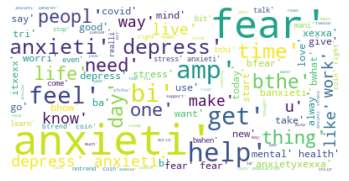

In [77]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
#wordcloud for anxiety data
anxiety = " ".join(review for review in df_anxiety.Clean_text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(anxiety)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

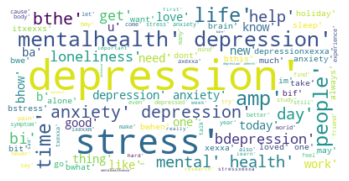

In [78]:
#wordcloud for depression data
dep = " ".join(review for review in df_dep.Clean_text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(dep)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

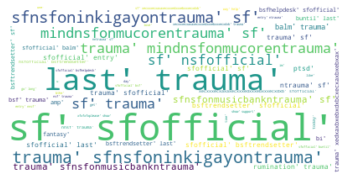

In [79]:
#wordcloud for PTSD data
ptsd = " ".join(review for review in df_ptsd.Clean_text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(ptsd)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

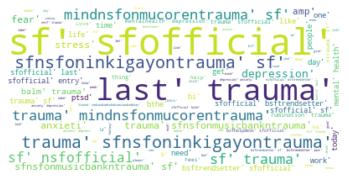

In [80]:
#wordcloud for all tweets
all_tweets = " ".join(review for review in df.Clean_text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_tweets)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()